-------------------Logistic Regression Algorithm-----------------
Name: Farhana Khatoon Abdul Rashid
Roll No.21
College name: Vivek College of Commerce
M.sc(I.T)[Sem 3]
Date and Time = 22/11/2022 08:13:07

Shape of data:-  (100, 3)

Data:- 
    DMV_Test_1  DMV_Test_2  Results
0   34.623660   78.024693        0
1   30.286711   43.894998        0
2   35.847409   72.902198        0
3   60.182599   86.308552        1
4   79.032736   75.344376        1


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.



Prediction on Test set:- [1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0 1 1 0]
   Real Values  Predicted Values
0            1                 1
1            0                 0
2            0                 0
3            0                 0
4            1                 1

Confusion Matrix:-
 [[11  0]
 [ 3 11]]

Accuracy:-  0.88

Recall:-
 0.7857142857142857

Precision:-
 1.0
======Classification report======
              precision    recall  f1-score   support

           0       0.79      1.00      0.88        11
           1       1.00      0.79      0.88        14

    accuracy                           0.88        25
   macro avg       0.89      0.89      0.88        25
weighted avg       0.91      0.88      0.88        25





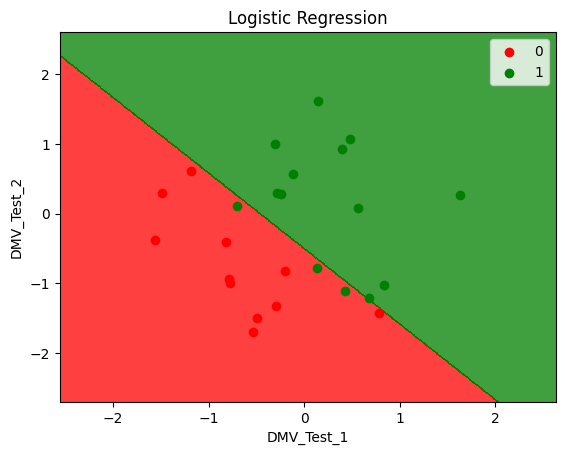

In [1]:
from datetime import datetime
print('-------------------Logistic Regression Algorithm-----------------')
print('Name: Farhana Khatoon Abdul Rashid')
print('Roll No.21')
print('College name: Vivek College of Commerce')
print('M.sc(I.T)[Sem 3]')
now = datetime.now()
# dd/mm/YY H:M:S
dt_string = now.strftime("%d/%m/%Y %H:%M:%S")
print("Date and Time =", dt_string)	
# Import the required libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Import the data set
# Reading Data
dataset = pd.read_csv('DMVWrittenTests.csv')
print("\nShape of data:- ", dataset.shape)
(237, 4)
print("\nData:- \n",dataset.head())
#Assigning ‘X’ as independent variable and ‘Y’ as dependent variable
X = dataset.iloc[:, [0, 1]].values
y = dataset.iloc[:, 2].values
#Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
#Training the Logistic Regression model on the Training Set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)
#Predicting the Test set results
y_pred = classifier.predict(X_test) 
print("\nPrediction on Test set:-", y_pred)
#Comparing the Real Values with Predicted Values
df = pd.DataFrame({'Real Values':y_test, 'Predicted Values':y_pred})
print(df.head())
#Confusion Matrix, Accuracy, Recall, Precision, and Classification report
from sklearn.metrics import confusion_matrix, recall_score, precision_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print("\nConfusion Matrix:-\n", cm)
from sklearn.metrics import accuracy_score 
print ("\nAccuracy:- ", accuracy_score(y_test, y_pred))
print("\nRecall:-\n", recall_score(y_test,y_pred))
print("\nPrecision:-\n", precision_score(y_test,y_pred))
cr=classification_report(y_test,y_pred)
print("======Classification report======")
print(cr)
print("\n")
#Visualising the Results
from matplotlib.colors import ListedColormap
X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression')
plt.xlabel('DMV_Test_1')
plt.ylabel('DMV_Test_2')
plt.legend()
plt.show()

